Model 1 : Without using Resnet

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
class_names = ['T-shirt', 'Trouse', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
def plot_label_distribution(labels, class_names):
  plt.figure(figsize=(10, 5))


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [ ]:
def create_model():
    initializer = tf.keras.initializers.RandomNormal(mean = 0.0, stddev=0.05)
    model = models.Sequential([
        layers.Input(shape=(784, )),
        layers.Dense(512, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.4),

        layers.Dense(256, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(128, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.2),

        layers.Dense(64, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.1),

       layers.Dense(10, activation='softmax')
    ])
    return model

In [ ]:
model = create_model()
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 578,890 (2.21 MB)

 Trainable params: 576,970 (2.20 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:
history = model.fit(
    x_train, y_train, validation_split = 0.2, epochs = 20, batch_size=128, verbose = 2
)

Epoch 1/20
375/375 - 10s - 28ms/step - accuracy: 0.7797 - loss: 0.6430 - val_accuracy: 0.8363 - val_loss: 0.4550
Epoch 2/20
375/375 - 1s - 3ms/step - accuracy: 0.8410 - loss: 0.4470 - val_accuracy: 0.8497 - val_loss: 0.4021
Epoch 3/20
375/375 - 3s - 7ms/step - accuracy: 0.8549 - loss: 0.4023 - val_accuracy: 0.8571 - val_loss: 0.3770
Epoch 4/20
375/375 - 3s - 7ms/step - accuracy: 0.8642 - loss: 0.3778 - val_accuracy: 0.8704 - val_loss: 0.3457
Epoch 5/20
375/375 - 1s - 4ms/step - accuracy: 0.8698 - loss: 0.3590 - val_accuracy: 0.8707 - val_loss: 0.3487
Epoch 6/20
375/375 - 2s - 5ms/step - accuracy: 0.8769 - loss: 0.3415 - val_accuracy: 0.8757 - val_loss: 0.3354
Epoch 7/20
375/375 - 2s - 4ms/step - accuracy: 0.8787 - loss: 0.3297 - val_accuracy: 0.8699 - val_loss: 0.3468
Epoch 8/20
375/375 - 2s - 6ms/step - accuracy: 0.8845 - loss: 0.3184 - val_accuracy: 0.8836 - val_loss: 0.3225
Epoch 9/20
375/375 - 3s - 7ms/step - accuracy: 0.8884 - loss: 0.3084 - val_accuracy: 0.8853 - val_loss: 0.3125

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 0)
print(f"Accuracy: {test_acc:.4f}")

Accuracy: 0.8869


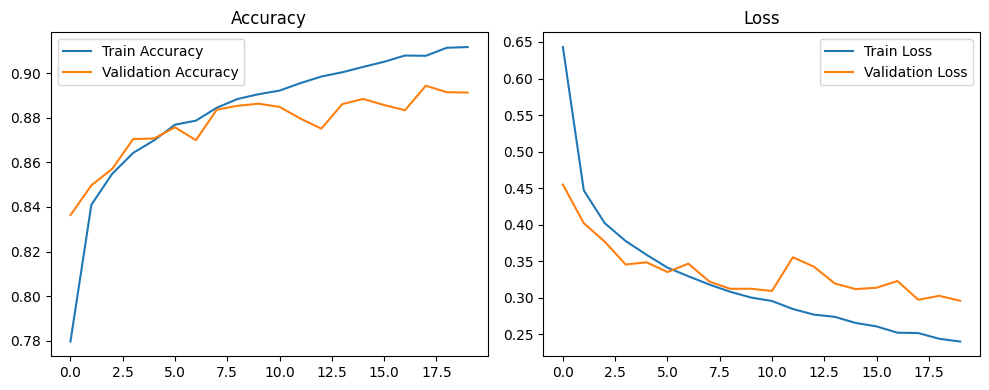

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


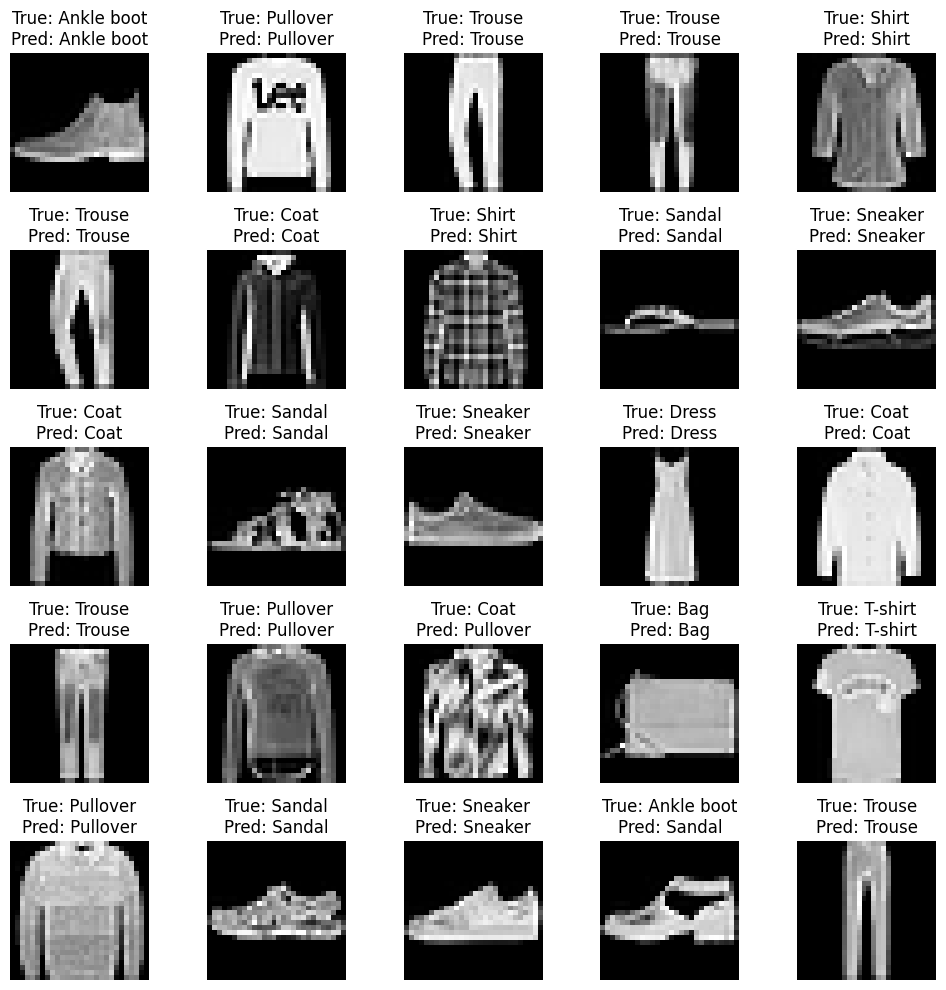

In [ ]:
predictions = model.predict(x_test)
pred_classes = np.argmax(predictions, axis=1)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    pred_label = np.argmax(predictions[i])
    plt.title(f"True: {class_names[y_test[i]]}\nPred: {class_names[pred_classes[i]]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
import math

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 784).astype("float32") / 255.0
x_test = x_test.reshape(-1, 784).astype("float32") / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

def cosine_decay(epoch, total_epochs=150, initial_lr=0.01, min_lr=1e-6):
    cosine_decay = 0.5 * (1 + math.cos(math.pi * epoch / total_epochs))
    decayed = (1 - min_lr) * cosine_decay + min_lr

    return initial_lr * decayed

def build_dense_resnet(input_shape=(784,), num_classes=10):
    input_layer = layers.Input(shape=input_shape)
    x = layers.GaussianNoise(0.2)(input_layer)

    # Initial Dense block
    x_init = layers.Dense(1024, kernel_regularizer=regularizers.l2(1e-4),
                          kernel_initializer="glorot_uniform")(x)
    x_init = layers.LayerNormalization()(x_init)
    x_init = layers.Activation("swish")(x_init)
    x_init = layers.Dropout(0.4)(x_init)

    y = layers.Dense(1024, kernel_regularizer=regularizers.l2(1e-4),
                     kernel_initializer="glorot_uniform")(x_init)
    y = layers.LayerNormalization()(y)
    y = layers.Activation("swish")(y)
    y = layers.Dropout(0.35)(y)

    y = layers.Dense(1024, kernel_regularizer=regularizers.l2(1e-4),
                     kernel_initializer="glorot_uniform")(y)
    y = layers.LayerNormalization()(y)

    res1 = layers.Add()([x_init, y])
    res1 = layers.Activation("swish")(res1)

    shortcut = layers.Dense(512, kernel_regularizer=regularizers.l2(1e-4),
                            kernel_initializer="glorot_uniform")(res1)
    shortcut = layers.LayerNormalization()(shortcut)

    y = layers.Dense(512, kernel_regularizer=regularizers.l2(1e-4),
                     kernel_initializer="glorot_uniform")(res1)
    y = layers.LayerNormalization()(y)
    y = layers.Activation("swish")(y)
    y = layers.Dropout(0.3)(y)

    y = layers.Dense(512, kernel_regularizer=regularizers.l2(1e-4),
                     kernel_initializer="glorot_uniform")(y)
    y = layers.LayerNormalization()(y)

    res2 = layers.Add()([shortcut, y])
    res2 = layers.Activation("swish")(res2)

    shortcut2 = layers.Dense(256, kernel_regularizer=regularizers.l2(1e-4),
                             kernel_initializer="glorot_uniform")(res2)
    shortcut2 = layers.LayerNormalization()(shortcut2)

    y2 = layers.Dense(256, kernel_regularizer=regularizers.l2(1e-4),
                      kernel_initializer="glorot_uniform")(res2)
    y2 = layers.LayerNormalization()(y2)
    y2 = layers.Activation("swish")(y2)
    y2 = layers.Dropout(0.25)(y2)

    y2 = layers.Dense(256, kernel_regularizer=regularizers.l2(1e-4),
                      kernel_initializer="glorot_uniform")(y2)
    y2 = layers.LayerNormalization()(y2)

    res3 = layers.Add()([shortcut2, y2])
    res3 = layers.Activation("swish")(res3)

    z = layers.Dense(128, kernel_regularizer=regularizers.l2(1e-4),
                     kernel_initializer="glorot_uniform")(res3)
    z = layers.LayerNormalization()(z)
    z = layers.Activation("swish")(z)
    z = layers.Dropout(0.25)(z)

    output_layer = layers.Dense(num_classes, activation="softmax")(z)

    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model

model2 = build_dense_resnet()

optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

model2.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=["accuracy"]
)

callbacks = [
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, min_lr=1e-6, verbose=1),
    EarlyStopping(monitor='val_accuracy', patience=12, restore_best_weights=True),
    LearningRateScheduler(cosine_decay)
]

history = model2.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=30,
    batch_size=256,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 72s 264ms/step - accuracy: 0.5904 - loss: 1.9930 - val_accuracy: 0.7845 - val_loss: 1.5575 - learning_rate: 0.0100
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 263ms/step - accuracy: 0.7996 - loss: 1.5399 - val_accuracy: 0.8198 - val_loss: 1.4915 - learning_rate: 0.0100
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 58s 247ms/step - accuracy: 0.8210 - loss: 1.4905 - val_accuracy: 0.8279 - val_loss: 1.4527 - learning_rate: 0.0100
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 86s 263ms/step - accuracy: 0.8281 - loss: 1.4594 - val_accuracy: 0.8319 - val_loss: 1.4444 - learning_rate: 0.0100
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 78s 247ms/step - accuracy: 0.8338 - loss: 1.4392 - val_accuracy: 0.8477 - val_loss: 1.4021 - learning_rate: 0.0100
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 84s 257ms/step - accuracy: 0.8396 - loss: 1.4204 - val_accuracy: 0.8438 - val_loss: 1.4155 - learning_rate: 0.0100
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 58s 247ms/step - accuracy: 0.8

In [16]:
test_loss, test_acc = model2.evaluate(x_test, y_test, verbose=0)
print(f"\n Test Accuracy: {test_acc:.4f}")


 Test Accuracy: 0.8888


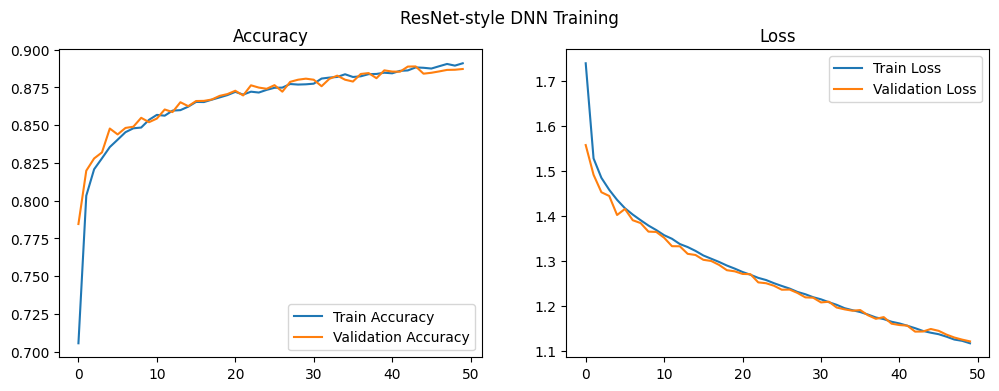

In [17]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)

    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("Loss")
    plt.legend()
    plt.show()

plot_history(history, "ResNet-style DNN Training")

# Dense-ResNet vs Standard DNN – Detailed Comparison (Fashion MNIST)

| **Aspect**                         | **Dense-ResNet Model**                                           | **Standard DNN**                                           |
|-----------------------------------|------------------------------------------------------------------|------------------------------------------------------------|
| **Architecture Type**             | Deep feedforward with residual connections                      | Plain feedforward (Sequential)                            |
| **Neural Layers (Dense)**         | 12 Dense layers                                                  | 5 Dense layers                                             |
| **Residual Connections**          |  Yes (ResNet-style additions across blocks)                    |  No                                                       |
| **Normalization**                 | LayerNormalization after each Dense layer                       |  BatchNormalization after each Dense layer               |
| **Activations**                   | Swish                                                            | ReLU                                                       |
| **Regularization**                | Dropout + L2 Regularization + GaussianNoise                      | Dropout only                                               |
| **Weight Initialization**         | Glorot Uniform                                                   | Random Normal (mean=0, std=0.05)                          |
| **Learning Strategy**             | SGD + Nesterov + Cosine LR Decay + Label Smoothing              | Default optimizer (typically Adam or SGD)                 |
| **Callbacks Used**                | ReduceLROnPlateau, EarlyStopping, LearningRateScheduler         | None / Minimal (can be added)                             |
| **Trainable Parameters**          | Higher (millions)                                                | Moderate (~a few hundred thousand)                        |
| **Training Time**                 | Higher (due to depth & complexity)                              | Faster to train                                            |
| **Test Accuracy**                 | **88.88%**                                                       | **~88.69%**                                                |

---

###  Summary

- The **Dense-ResNet model** uses residual blocks, deeper architecture, and extensive regularization techniques to **slightly outperform** the DNN in accuracy — at the cost of increased training time and model size.
- Your **standard DNN**, though simpler and lighter, still achieves **competitive accuracy**, making it suitable for faster experimentation or deployment when compute is limited.

 Both models are solid, but the **Dense-ResNet** has higher generalization potential and robustness due to residual connections and swish activations.
